In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [38]:
df = pd.read_csv('Pokemon.csv', encoding='latin-1')
print(f"数据形状（行数×列数）：{df.shape}") 
print("\n数据前5行：")
print(df.head())
print("\n数据列名：")
print(df.columns.tolist())
print("\n数据类型：")
print(df.dtypes)

数据形状（行数×列数）：(810, 13)

数据前5行：
   #                   Name Type 1  Type 2 Total  HP Attack Defense Sp. Atk  \
0  1              Bulbasaur  Grass  Poison   318  45     49      49      65   
1  2                Ivysaur  Grass  Poison   405  60     62      63      80   
2  3               Venusaur  Grass  Poison   525  80     82      83     100   
3  3  VenusaurMega Venusaur  Grass  Poison   625  80    100     123     122   
4  4             Charmander   Fire     NaN   309  39     52      43      60   

  Sp. Def Speed Generation Legendary  
0      65    45          1     FALSE  
1      80    60          1     FALSE  
2     100    80          1     FALSE  
3     120    80          1     FALSE  
4      50    65          1     FALSE  

数据列名：
['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']

数据类型：
#             object
Name          object
Type 1        object
Type 2        object
Total         object
HP            

In [39]:
print("\n=== 处理无意义空行 ===")
# 查看数据尾部10行，确认空行位置
print("数据尾部10行（查看空行）：")
print(df.tail(10))



=== 处理无意义空行 ===
数据尾部10行（查看空行）：
             #                 Name     Type 1     Type 2      Total  \
800        718     Zygarde50% Forme     Dragon     Ground        600   
801        719              Diancie       Rock      Fairy        600   
802        719  DiancieMega Diancie       Rock      Fairy        700   
803        720  HoopaHoopa Confined    Psychic      Ghost        600   
804        720   HoopaHoopa Unbound    Psychic       Dark        680   
805        721            Volcanion       Fire      Water        600   
806  undefined            undefined  undefined  undefined  undefined   
807  undefined            undefined  undefined  undefined  undefined   
808        NaN                  NaN        NaN        NaN        NaN   
809        NaN                  NaN        NaN        NaN        NaN   

            HP     Attack    Defense    Sp. Atk    Sp. Def      Speed  \
800        108        100        121         81         95         95   
801         50        100    

In [40]:
# 删除最后两行空行
df_clean_1 = df.iloc[:-2].copy()
print(f"\n删除空行后数据形状：{df_clean_1.shape}") 


删除空行后数据形状：(808, 13)


In [41]:
print("\n=== 处理Type 2列异常值 ===")
# 查看Type 2列的唯一值，确认异常值“273”
print("Type 2列的唯一值（含异常值）：")
print(df_clean_1["Type 2"].unique())


=== 处理Type 2列异常值 ===
Type 2列的唯一值（含异常值）：
['Poison' nan 'Flying' 'Dragon' '0' 'Ground' '273' 'Fairy' 'Grass'
 'Fighting' 'Psychic' 'Steel' 'Ice' 'A' 'Rock' 'Dark' 'Water' 'Electric'
 'Fire' 'Ghost' 'Bug' 'BBB' 'Normal' 'undefined']


In [43]:
abnormal_type2 = df_clean_1[df_clean_1["Type 2"] == "273"]
print(f"\nType 2取值为'273'的异常数据行数：{abnormal_type2.shape[0]}")
df_clean_2 = df_clean_1[df_clean_1["Type 2"] != "273"].copy()
print(f"\n删除Type 2异常值后数据形状：{df_clean_2.shape}")


Type 2取值为'273'的异常数据行数：1

删除Type 2异常值后数据形状：(807, 13)


In [44]:
print("\n=== 处理重复值 ===")
# 查看完全重复的行
duplicated_rows = df_clean_2[df_clean_2.duplicated()]
print(f"重复数据行数：{duplicated_rows.shape[0]}")
if duplicated_rows.shape[0] > 0:
    print("重复数据详情：")
    print(duplicated_rows[["Name", "Type 1", "Total", "Legendary"]])

# 删除重复值（保留第一次出现的行）
df_clean_3 = df_clean_2.drop_duplicates().copy()
print(f"\n删除重复值后数据形状：{df_clean_3.shape}")



=== 处理重复值 ===
重复数据行数：6
重复数据详情：
          Name     Type 1      Total  Legendary
15     Metapod        Bug        205      FALSE
23   Pidgeotto     Normal        349      FALSE
185    Ariados        Bug        390      FALSE
186    Ariados        Bug        390      FALSE
187    Ariados        Bug        390      FALSE
807  undefined  undefined  undefined  undefined

删除重复值后数据形状：(801, 13)


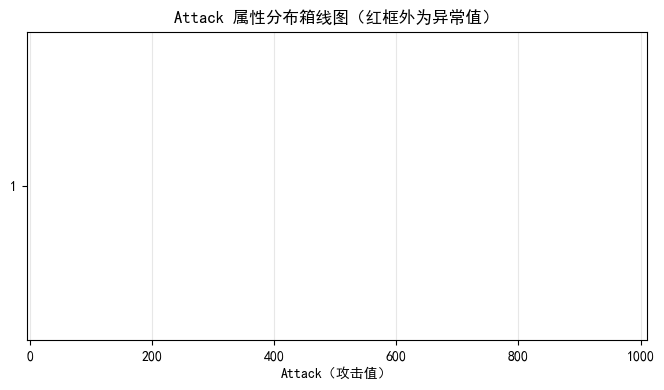


Attack 异常高值阈值（上限）：167.50
Attack 异常高值数据行数：9
Attack 异常高值详情：
                        Name   Type 1  Attack Total
9                   Squirtle    Water   840.0   314
140                   Tauros   Normal  1000.0   490
165      MewtwoMega Mewtwo X  Psychic   190.0   780
237  HeracrossMega Heracross      Bug   185.0   600
430    GroudonPrimal Groudon   Ground   180.0   770
432    RayquazaMega Rayquaza   Dragon   180.0   780
435       DeoxysAttack Forme  Psychic   180.0   600
500    GarchompMega Garchomp   Dragon   170.0   700
717       KyuremBlack Kyurem   Dragon   170.0   700

删除 Attack 异常高值后数据形状：(790, 13)


In [48]:
# 先将 Attack 列转换为数值类型，若转换过程中遇到无法转换的值（如非数字字符串），会将其设置为 NaN
df_clean_3["Attack"] = pd.to_numeric(df_clean_3["Attack"], errors='coerce')

# 1. 可视化 Attack 分布（用箱线图识别异常值）
plt.figure(figsize=(8, 4))
plt.boxplot(df_clean_3["Attack"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title("Attack 属性分布箱线图（红框外为异常值）")
plt.xlabel("Attack（攻击值）")
plt.grid(axis='x', alpha=0.3)
min_value = df_clean_3["Attack"].min()
max_value = df_clean_3["Attack"].max()
plt.xlim(min_value - 10, max_value + 10)
plt.show()

# 2. 用 IQR 法计算异常值阈值，删除异常高值
Q1 = df_clean_3["Attack"].quantile(0.25)  
Q3 = df_clean_3["Attack"].quantile(0.75)  
IQR = Q3 - Q1  
upper_bound = Q3 + 1.5 * IQR  

# 筛选 Attack 异常高值
abnormal_attack = df_clean_3[df_clean_3["Attack"] > upper_bound]
print(f"\nAttack 异常高值阈值（上限）：{upper_bound:.2f}")
print(f"Attack 异常高值数据行数：{abnormal_attack.shape[0]}")
if abnormal_attack.shape[0] > 0:
    print("Attack 异常高值详情：")
    print(abnormal_attack[["Name", "Type 1", "Attack", "Total"]])

# 删除 Attack 异常高值行
df_clean_4 = df_clean_3[df_clean_3["Attack"] <= upper_bound].copy()
print(f"\n删除 Attack 异常高值后数据形状：{df_clean_4.shape}")

In [50]:
print("\n=== 处理 Generation 与 Legendary 属性置换 ===")
# 查看两列原始数据类型与取值
print("置换前：")
print(f"Generation 列数据类型：{df_clean_4['Generation'].dtype}")
print(f"Legendary 列数据类型：{df_clean_4['Legendary'].dtype}")
print(f"Generation 列唯一值：{df_clean_4['Generation'].unique()}")
print(f"Legendary 列唯一值：{df_clean_4['Legendary'].unique()}")

# 筛选置换数据：Generation 应为数值（1 - 6），Legendary 应为布尔值（True/False）
swap_condition = (
    # Generation 出现布尔值（置换特征）
    df_clean_4["Generation"].isin([True, False]) |
    # Legendary 出现数值（置换特征）
    (df_clean_4["Legendary"].apply(lambda x: isinstance(x, (int, float)) and x not in [True, False]))
)
swapped_rows = df_clean_4[swap_condition]
print(f"\n属性置换的数据行数：{swapped_rows.shape[0]}")
if swapped_rows.shape[0] > 0:
    print("置换数据详情（置换前）：")
    print(swapped_rows[["Name", "Generation", "Legendary"]])

# 修复置换：交换两列的值
df_clean_5 = df_clean_4.copy()
for idx in swapped_rows.index:
    df_clean_5.at[idx, "Generation"], df_clean_5.at[idx, "Legendary"] = \
        df_clean_5.at[idx, "Legendary"], df_clean_5.at[idx, "Generation"]

# 进一步检查 Generation 列，将非整数值替换为 NaN
df_clean_5["Generation"] = pd.to_numeric(df_clean_5["Generation"], errors='coerce')

# 删除 Generation 列中为 NaN 的行
df_clean_5 = df_clean_5.dropna(subset=["Generation"])

# 转换为正确数据类型
df_clean_5["Generation"] = df_clean_5["Generation"].astype(int)
df_clean_5["Legendary"] = df_clean_5["Legendary"].astype(bool)

# 验证修复结果
print("\n修复后：")
print(f"Generation 列数据类型：{df_clean_5['Generation'].dtype}")
print(f"Legendary 列数据类型：{df_clean_5['Legendary'].dtype}")
print(f"Generation 列唯一值：{df_clean_5['Generation'].unique()}")
print(f"Legendary 列唯一值：{df_clean_5['Legendary'].unique()}")


=== 处理 Generation 与 Legendary 属性置换 ===
置换前：
Generation 列数据类型：object
Legendary 列数据类型：object
Generation 列唯一值：['1' 'FALSE' '2' '3' '4' '5' '6' 'undefined']
Legendary 列唯一值：['FALSE' '1' '0' 'Poison' 'Ground' 'TRUE' nan]

属性置换的数据行数：1
置换数据详情（置换前）：
                    Name Generation Legendary
533  GalladeMega Gallade          4       NaN

修复后：
Generation 列数据类型：int32
Legendary 列数据类型：bool
Generation 列唯一值：[1 2 3 4 5 6]
Legendary 列唯一值：[ True]


In [51]:
print("\n=== 数据清洗最终结果验证 ===")
print(f"最终清洗后数据形状：{df_clean_5.shape}")
print("\n各列缺失值统计（确认无新增缺失）：")
print(df_clean_5.isnull().sum())
print("\nAttack 属性描述性统计（确认异常值已删除）：")
print(df_clean_5["Attack"].describe())
print("\n清洗后数据前 5 行：")
print(df_clean_5.head())


=== 数据清洗最终结果验证 ===
最终清洗后数据形状：(786, 13)

各列缺失值统计（确认无新增缺失）：
#               0
Name            0
Type 1          0
Type 2        377
Total           0
HP              1
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Attack 属性描述性统计（确认异常值已删除）：
count    786.000000
mean      78.095420
std       31.113432
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      165.000000
Name: Attack, dtype: float64

清洗后数据前 5 行：
   #                   Name Type 1  Type 2 Total  HP  Attack Defense Sp. Atk  \
0  1              Bulbasaur  Grass  Poison   318  45    49.0      49      65   
1  2                Ivysaur  Grass  Poison   405  60    62.0      63      80   
2  3               Venusaur  Grass  Poison   525  80    82.0      83     100   
3  3  VenusaurMega Venusaur  Grass  Poison   625  80   100.0     123     122   
4  4             Charmander   Fire     NaN   309  39    52.0     